# Lead generation and churn

# Goals
Develop and apply different methods for lead generation and churn prediction. These methodologies are broadly used in business to multiple use cases as:
- Identify **new customers** in the market
- Identify customers in our internal Data Warehouse with **more likely** to buy a new product
- Identify unsatisfied customers and thus, likely to be **churners**

In this project I will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering, model training and prediction, and finally, data visualization in order to identify potential churners and leads. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the Logistic Regression Model. Analysis of metrics (recall, precision, confusion metrics)
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features
4. Create the Lead Generation pipeline: build up the lead generation pipeline to identify potential Streaming customers.
5. Data visualization: Build up an interactive dashboard in order to convert data into easily consumable information.

We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.



# Context:  Using Machine Learning to increase our customers base and retain certain customers

We work as a in the data science and AI department of a Telecommunication company.

Our marketing colleagues noticed that the volume of churners is increasing and are planning to launch a new commercial campaign for capturing new customers for our streaming services. To solve the first issue, we have to somehow identify those customers that want to leave our company and let the Marketing team to know who they are. For the second issue, we have to decide which potential customers are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base those people that are more likely to hire our streaming services and become a new customer. 



## Dataset

The dataset has been extracted from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)(Telco Customer Churn dataset) and contains information about 7.043 customers.

- **customerId**: Customer Id
- **gender**: Whether the customer is a male or a female
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
- **Partner**: Whether the customer has a partner or not (Yes, No)
- **Dependents**: Whether the customer has dependents or not (Yes, No)
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has a phone service or not (Yes, No)
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned or not (Yes or No)

## Imports

In [1]:
!pip install pandas_profiling

In [2]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,scorer,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

# Set Pandas to show all the columns
pd.set_option('display.max_columns', None)

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# **1. Data understanding and preparation**

In order to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the values of the variables to solve the use case, we need to perform **Exploratory Data Analysis (EDA)**. To do so, we will 
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them

### **1.1 Read the data**

In [3]:
# Define the parameters to read the data
root_path = "../data"
dataset = "dataset.csv"
sep = ","
encoding = "utf-8"

# Read the data
original_data = pd.read_csv(filepath_or_buffer=os.path.abspath(os.path.join(root_path, dataset)), sep = sep, encoding = encoding)
data = original_data.copy()

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



### **1.2 Dataset Exploratory Data Analysis (EDA)**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


--------
The data has 7043 records (rows) and 21 columns.

No null value is found in the dataset, as all columns have exactly 7043 non-null values.

Almost no attribute has the correct dataype, most columns have object as their datatype. The datatype modifications will be done in next cells.

--------
### Datatype Conversion

Once we have the first contact with the dataset, next step is to change the datatype of those fields whose datatype is wrong.
Let us first change to categorical the fields where the length of its unique values is lower than 10.

In [6]:
# Checking which columns have less than 10 unique values and printing them
print('The following columns will be considered categorical values as they have less than 10 unique values:\n')
categorical_cols = []
print ("{:20} {:^15}".format('Column','Num Unique Values'),'\n---------------------------------------------')
for column in data.columns:
    if(len(data[column].unique()) < 10):
        print ("{:20} {:^15}".format(column, len(data[column].unique())))
        categorical_cols.append(column)    
        
               
# Convert the columns to category dtype
data[categorical_cols] = data[categorical_cols].astype("category")

The following columns will be considered categorical values as they have less than 10 unique values:

Column               Num Unique Values 
---------------------------------------------
gender                      2       
SeniorCitizen               2       
Partner                     2       
Dependents                  2       
PhoneService                2       
MultipleLines               3       
InternetService             3       
OnlineSecurity              3       
OnlineBackup                3       
DeviceProtection            3       
TechSupport                 3       
StreamingTV                 3       
StreamingMovies             3       
Contract                    3       
PaperlessBilling            2       
PaymentMethod               4       
Churn                       2       


TotalCharges comes as object, so we must change it to float. If we tried directly we will get an error saying _could not convert string to float:_ which means that there is an empty string in the column. In the next cell, we will build up a pipeline that allows you to change the datatype to float.

In [7]:
data['TotalCharges'] = data['TotalCharges'].replace(r'^\s+$', 0.0, regex=True).astype("float64")

**Realize the Pandas Profilling in order to speed up the EDA**

Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis and generatesinteractive reports in web format.

In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

In [8]:
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile

**Check relationship among Churn and numerical attributes**

In [9]:
# Define the target column
target_variable = ["Churn"]

# Define the numerical variables
num_variables = [column for column, datatype in data.dtypes.items() if datatype in (np.int64, np.float64)]

# Define the categorical ones
categorical_variables = [column for column in data.columns if column not in target_variable + num_variables]

# Removing customerID as it is just an index
categorical_variables = categorical_variables[1:]

To check the relationship of churn with the numerical variables we will use barplots.

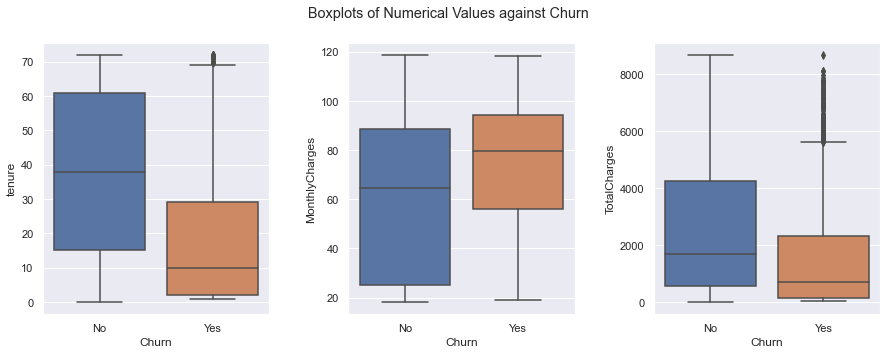

In [10]:
sns.set()
fig, axes = plt.subplots(ncols=len(num_variables),figsize=(15,5))
plt.subplots_adjust(wspace=.35)

for i in range(0,len(num_variables)):
    sns.boxplot(x=target_variable[0],y=num_variables[i],data=data,ax=axes[i])
    
plt.suptitle('Boxplots of Numerical Values against Churn')
plt.show()

**Check relationship among Churn and categorical attributes**

To check the relationship of churn with the categorical variables we will use countplots.

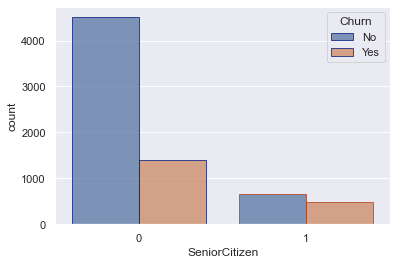

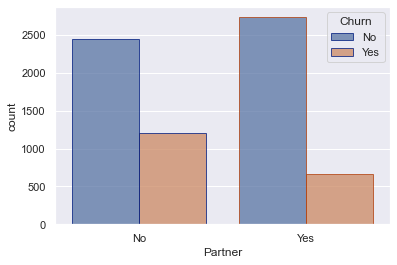

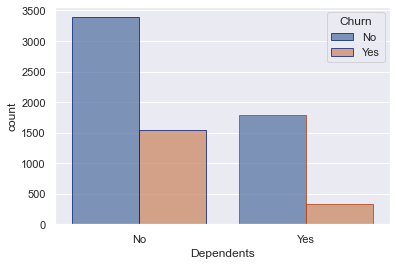

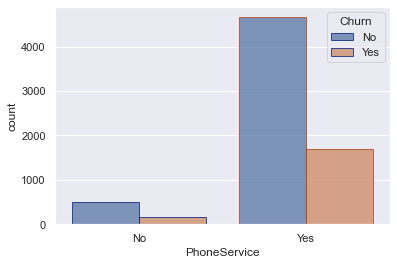

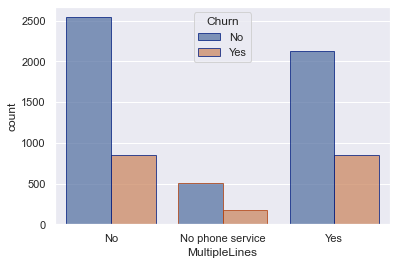

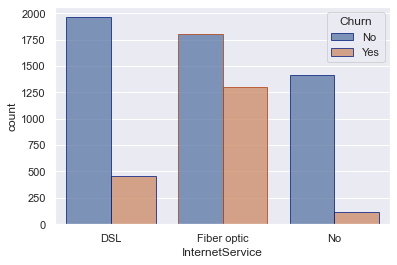

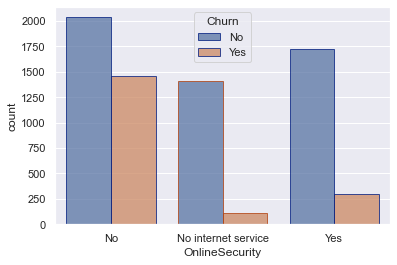

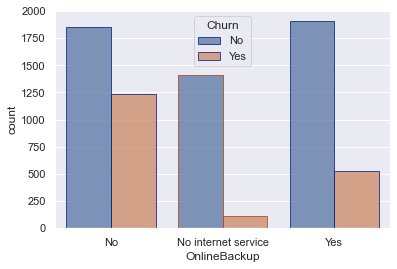

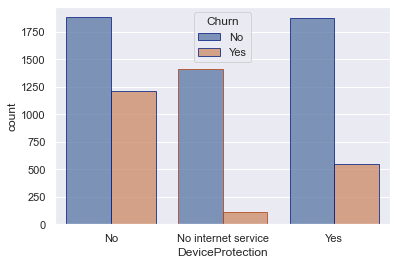

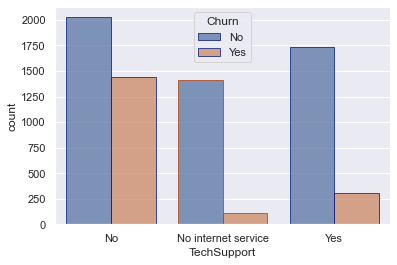

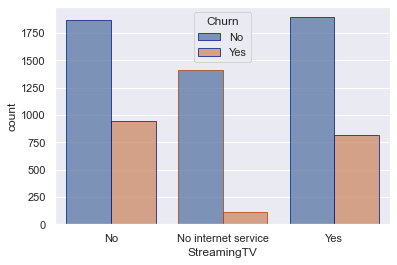

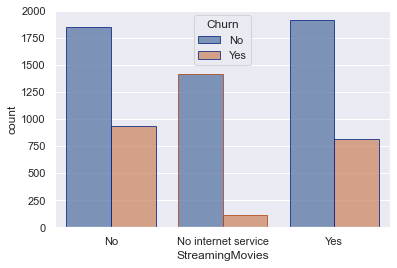

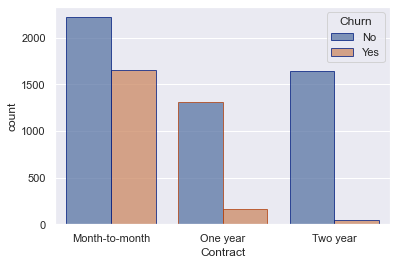

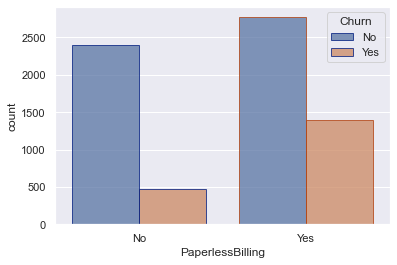

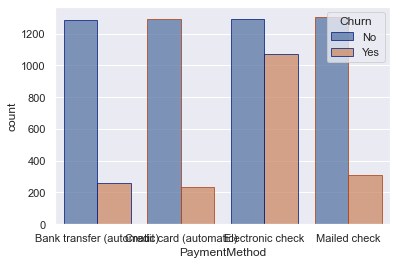

In [11]:
for i in range(1,len(categorical_variables)):
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[categorical_variables[i]],hue=data[target_variable[0]],edgecolor=sns.color_palette("dark", 2),alpha=0.75)
    plt.show()

By looking at the plots above and the plots of the next cell, we can appreciate the relation of the variable with the churn value.

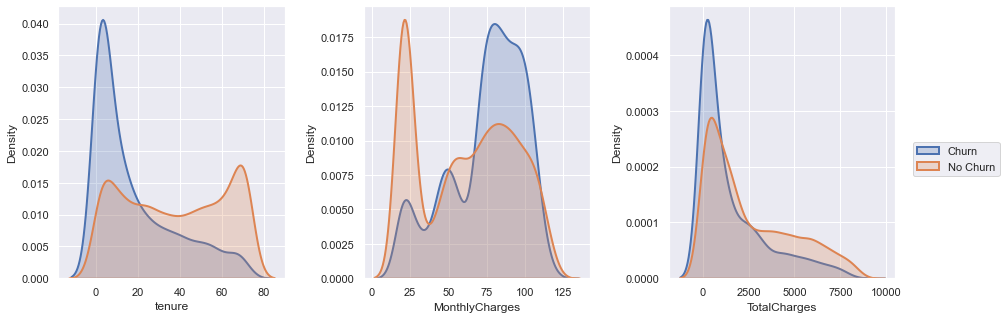

In [12]:
import warnings
# Remove warnings about future deprecated functions
warnings.simplefilter(action='ignore', category=FutureWarning)

# Numerical variables discussion
fig, axes = plt.subplots(ncols=len(num_variables),nrows=1,figsize=(15,5))
plt.subplots_adjust(wspace=.35)

for i in range(0,len(num_variables)):
    sns.distplot(data[num_variables[i]][data.Churn=='Yes'],hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, ax=axes[i])
    sns.distplot(data[num_variables[i]][data.Churn=='No' ],hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, ax=axes[i])
    
fig.legend(labels=['Churn','No Churn'],loc=7)
plt.show()

By looking at these plots, we can appreciate that tenure seems to be a good measure for our model. The reason for that, is that  most churn customers have low values (0-20) of tenure. This might allow us to classify better as both classes are differentiated, and therefore using an optimal cutoff will yield good results. Therefore, tenure seem to be highly related with Churn.

On the other hand, TotalCharges densities for both classes are very similar. Because of this the variable will not help us much at classifying customers. 

MonthlyCharges might be useful as there is a significant difference between classes for extreme values (both high and low). However, the middle values do not give much information as densities are very similar.

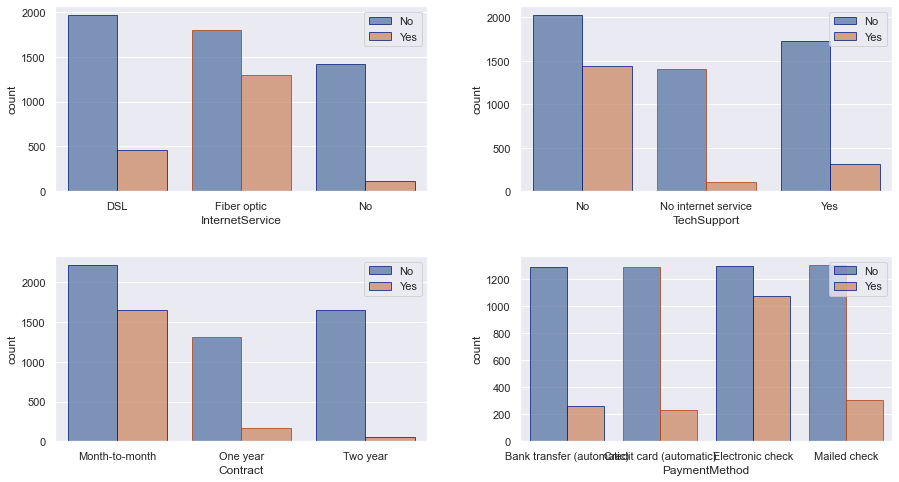

In [13]:
# Categorical variables discussion
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15,8))
plt.subplots_adjust(wspace=.25,hspace=.35)

aux = sns.countplot(x=data['InternetService'],hue=data[target_variable[0]],edgecolor=sns.color_palette("dark", 2),alpha=0.75, ax=axes[0,0])
aux.legend(loc='upper right')

aux = sns.countplot(x=data['TechSupport'],hue=data[target_variable[0]],edgecolor=sns.color_palette("dark", 2),alpha=0.75, ax=axes[0,1])
aux.legend(loc='upper right')

aux =sns.countplot(x=data['Contract'],hue=data[target_variable[0]],edgecolor=sns.color_palette("dark", 2),alpha=0.75, ax=axes[1,0])
aux.legend(loc='upper right')

aux = sns.countplot(x=data['PaymentMethod'],hue=data[target_variable[0]],edgecolor=sns.color_palette("dark", 2),alpha=0.75, ax=axes[1,1])
aux.legend(loc='upper right')
plt.show()

Looking at the countplots of these 4 categorical values we can see how churners mostly have 1 specific value for each category. Most churners have Fiber Optic as their InternetSercive, have No TechSupport, have a Month-to-month Contract and pay using electronic check.

Because they allow us to differentiate between both classes, therefore they are highly related with Churn, it is likely they will help us to improve significantly our model's performance and accuracy. 

### **1.3 Data wrangling**

Once the dataset has been explored, the next step is to clean it. This process, known as **Data Wrangling**, it is composed by: 
* Removal of null values
* Standardization
* Removing fields that are not of interest 



Along the categorical columns we can see that in some of them there are three values:

- Yes

- No

- No internet service (or No phone service)

As the 'No internet service' is not a valuable value we will change it by 'No' and convert to binary datatype those categorical columns where the length of unique values is 2.

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in categorical_variables + target_variable:
    # Converting variables to binary
    if 'No internet service' in data[col].unique() or 'No phone service' in data[col].unique():
        data[col].replace({"No phone service": "No","No internet service": "No"}, inplace=True)
        
    # Use label encoder for binary variables
    if len(data[col].unique()) == 2:
        data[col]=le.fit_transform(data[col])

Encode categorical variables (those that are not binary) with one-hot-encoding.

In [15]:
data = pd.get_dummies(data,columns=data.select_dtypes(include='category').columns)  

In order to build up the model and increase its efficiency, we will scale numerical variables to mean = 0 and std = 1.

In [16]:
scaler = StandardScaler()
data[num_variables] = scaler.fit_transform(data[num_variables])

# **2. Model Training: Building a churn prediction model**

In order to build the model, we will use a simple Logistic Regression. 

When building a model, a crucial step is to choose a right model threshold (usually known as model cutoff value). This threshold modifies the output class probability density function in order to balance the model and fit our requirements. The model cutoff plays a really important role when designing a model. For that reason, we will train our model, predict and modify the prediction value according the selected threshold.

In [17]:
from sklearn.metrics import confusion_matrix

def train_model_and_performance_eval(logit,train_x,test_x,train_y,test_y, cols, cutoff = 0.5, cf = 'coefficients'):
    # Fit the model (train)
    logit.fit(train_x,train_y)
    
    # Calculate its predictions (0, 1) and their probability 
    pred_labels = logit.predict(test_x)
    pred_probs = logit.predict_proba(test_x)
    
    # Modify the prediction value according to the cutoff value
    for i in range(0,len(pred_labels)): 
        if pred_probs[i][1] < cutoff:
            pred_labels[i] = 0                 
        else:
            pred_labels[i] = 1

    
    # Calculate the coefficients dataframe depending on if they are real coefficients or features
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(logit.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(logit.feature_importances_)
    
    # Set the coefficients to be shown
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    # Print the accuracy and classification reports (see accuracy_score and classification_report functions)
    accuracy = accuracy_score(test_y,pred_labels)
    class_report = classification_report(test_y,pred_labels)
    
    print('The accuracy of the model is: %.4f\n' % (accuracy))
    print('Classification Report:\n',class_report,'\n')
    
    conf_matrix = confusion_matrix(test_y, pred_labels)
    print('True Positives: %d  False Positives: %d' % (conf_matrix[1][1],conf_matrix[0][1]),'\n')

    # Plot confusion matrix (see plot_confusion_matrix function)
    plt.figure(figsize=(7,5))

    # Uncomment if we want normalized confusion matrix
    #conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    sns.heatmap(conf_matrix,cmap=plt.cm.Blues,annot=True,fmt='g')

    # Not using this function since it doesn't update properly when modifying cutoff value
    #plot_confusion_matrix(logit,test_x,test_y,normalize='true',cmap=plt.cm.Blues)

    plt.yticks(rotation=0)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.title("Confusion Matrix",pad=10)
    plt.show()

    # Plot the probability density chart
    plt.figure(figsize=(8,5))
    sns.distplot(pred_probs[:,1][test_y==0],hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2},label='Class 0')
    sns.distplot(pred_probs[:,1][test_y==1],hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2},label='Class 1')  
    plt.axvline(cutoff,color='darkgoldenrod',ls='--',label='Cutoff %.1f' % (cutoff))
    plt.title("Probability Density Plot",pad = 10,fontsize=15)
    plt.legend()
    plt.show()

    # Plot feature importance bar
    # Prepare Data
    coef_sumry.reset_index(inplace=True)
    coef_sumry['colors'] = ['red' if x < 0 else 'green' for x in coef_sumry['coefficients']]
    coef_sumry

    # Draw plot
    plt.figure(figsize=(14,10), dpi= 80)
    plt.hlines(y=coef_sumry.index, xmin=0, xmax=coef_sumry.coefficients, color=coef_sumry.colors, alpha=0.4, linewidth=5)

    # Decorations
    plt.gca().set(ylabel='$Features$', xlabel='$Coefficients$')
    plt.yticks(coef_sumry.index, coef_sumry.features, fontsize=12)
    plt.title('Feature Importance', fontdict={'size':20})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
    
    return pred_probs

The accuracy of the model is: 0.7923

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1385
           1       0.64      0.53      0.58       517

    accuracy                           0.79      1902
   macro avg       0.74      0.71      0.72      1902
weighted avg       0.78      0.79      0.79      1902
 

True Positives: 276  False Positives: 154 



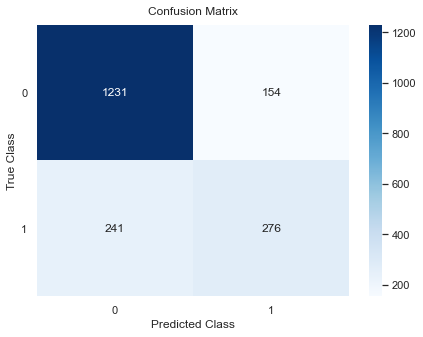

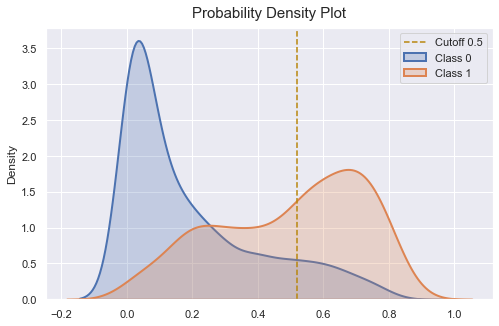

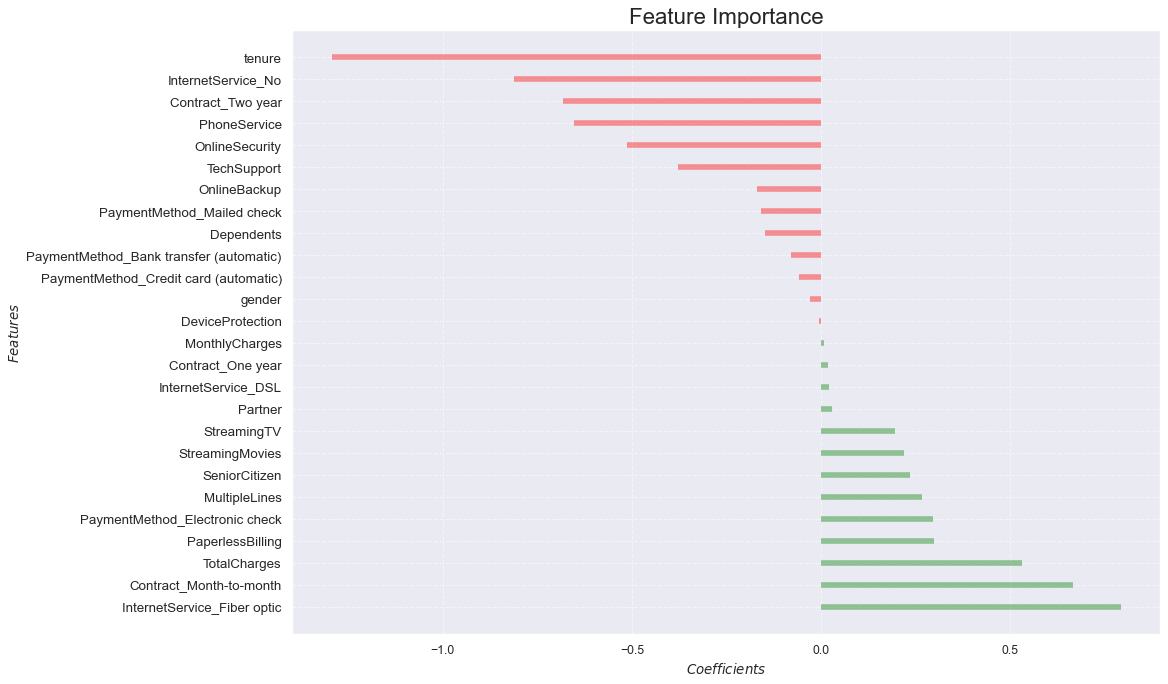

In [18]:
# Getting columns to be used when training
cols = [i for i in data.columns if i not in ("Churn", "customerID")]

# Split train, validation and test data
train_val, test = train_test_split(data, test_size = .1 ,random_state = 1)
train, val = train_test_split(train_val, test_size = .3 ,random_state = 1)

train_x = train[cols]
train_y = train["Churn"]
val_x = val[cols]
val_y = val["Churn"].values.ravel()


# Change the hyperparameters in order and try to get the best model (Best hyperparamers and features selection done in EX11, not here)
logit  = LogisticRegression(C=1, max_iter=100, solver='newton-cg')

# Train the model
pred_probs = train_model_and_performance_eval(logit, train_x, val_x, train_y, val_y, cols, cutoff = 0.52)

Let us now decide which is the best model we can train. For that, we will answer the following questions.

### 2.1 Decide which variables to use for training the model

In [19]:
k = 10
corr = data.corr()['Churn']
absolute_corr = abs(data.corr()['Churn']).sort_values(ascending=False)[1:k+1]

print('Top %d Variables with higher absolute correlation with churn:' % k)
for key in absolute_corr.keys():
    print('  ·',key,'(%.2f)' % corr[key])

# Select the top K (10) variables correlated, in absolute value, with churn
selected_variables = list(absolute_corr.keys())

Top 10 Variables with higher absolute correlation with churn:
  · Contract_Month-to-month (0.41)
  · tenure (-0.35)
  · InternetService_Fiber optic (0.31)
  · Contract_Two year (-0.30)
  · PaymentMethod_Electronic check (0.30)
  · InternetService_No (-0.23)
  · TotalCharges (-0.20)
  · MonthlyCharges (0.19)
  · PaperlessBilling (0.19)
  · Contract_One year (-0.18)


Using all of the available variables to train the model, except our target variable (Churn), may not be the optimal decision. Using variables that do not help us significantly to predict if a client is a churner or not, may **reduce the performance** and **increase the training time** of our model.

In order to decide which variables we will use in the model, we will look at the correlation between the variables and our target variable. By sorting the variables in descending order of their **absolute value of correlation**, we can obtain a ranking based on the effect of the variables for the prediction. After doing some tests, by keeping the top 10 variables we obtain a nice performance, and we reduce training time.

### 2.2 Hyperparameters and cutoff tunning

In [20]:
# Train model based on cutoff and show relevant metrics
def train_model_and_show_metrics(logit, train_x, test_x, train_y, test_y, cutoff = 0.5):
    # Fit the model (train)
    logit.fit(train_x,train_y)
    
    # Calculate its predictions (0, 1) and their probability 
    pred_labels = logit.predict(test_x)
    pred_probs = logit.predict_proba(test_x)
    
    # Modify the prediction value according to the cutoff value
    for i in range(0,len(pred_labels)): 
        if pred_probs[i][1] < cutoff:
            pred_labels[i] = 0                 
        else:
            pred_labels[i] = 1
            
    conf_matrix = confusion_matrix(test_y, pred_labels)
    
    class_report = classification_report(test_y,pred_labels)
    print('Class 1 Precision: %.2f\nClass 1 Recall: %.2f' % (conf_matrix[1][1]/(conf_matrix[0][1]+conf_matrix[1][1]),conf_matrix[1][1]/(conf_matrix[1][0]+conf_matrix[1][1])),'\n')

In [21]:
# Test to find optimal hyperparameters
train_val, test = train_test_split(data, test_size = .1 ,random_state = 1)
train, val = train_test_split(train_val, test_size = .3 ,random_state = 1)

train_x = train[selected_variables]
train_y = train["Churn"]
val_x = val[selected_variables]
val_y = val["Churn"].values.ravel()


cutoffs = [0.25,0.3, 0.35, 0.4, 0.45]
solvers = ['newton-cg','liblinear']

for cut in cutoffs:
    for solver in solvers:
        logit  = LogisticRegression(C=0.1, max_iter=1000, solver=solver, penalty='l2')
        print('Cutoff Value %.3f and Solver %s:' % (cut,solver))
        train_model_and_show_metrics(logit, train_x, val_x, train_y, val_y, cut)

Cutoff Value 0.250 and Solver newton-cg:
Class 1 Precision: 0.50
Class 1 Recall: 0.82 

Cutoff Value 0.250 and Solver liblinear:
Class 1 Precision: 0.50
Class 1 Recall: 0.83 

Cutoff Value 0.300 and Solver newton-cg:
Class 1 Precision: 0.53
Class 1 Recall: 0.79 

Cutoff Value 0.300 and Solver liblinear:
Class 1 Precision: 0.52
Class 1 Recall: 0.79 

Cutoff Value 0.350 and Solver newton-cg:
Class 1 Precision: 0.54
Class 1 Recall: 0.69 

Cutoff Value 0.350 and Solver liblinear:
Class 1 Precision: 0.54
Class 1 Recall: 0.70 

Cutoff Value 0.400 and Solver newton-cg:
Class 1 Precision: 0.57
Class 1 Recall: 0.65 

Cutoff Value 0.400 and Solver liblinear:
Class 1 Precision: 0.57
Class 1 Recall: 0.65 

Cutoff Value 0.450 and Solver newton-cg:
Class 1 Precision: 0.61
Class 1 Recall: 0.60 

Cutoff Value 0.450 and Solver liblinear:
Class 1 Precision: 0.60
Class 1 Recall: 0.60 



Our objective is to create a model that determines most of the clients that are
potential churners, therefore we want to **maximize** the recall, TP/(TP + FN).
However, the obvious cutoff value to maximize the ratio will be very close to 0.
That way it will classify all clients as churners, but despite having a perfect recall
the precision will be very bad. We want to lower our cutoff to maximize Churn
class recall but without lowering the precision too much. This will allow us to
determine most of our actual clients who are **likely to become churners**, but we
need a precise model so that it will be useful for the marketing team. Therefore,
we want to find a cutoff value that has a **high recall**, for churn class, but also a
**reasonably high precision**. To see better the results, we have formatted them in the table shown below.

<img src="../data/Hyperparameters_Tunning.PNG">

<br>

The cutoff values of the table are between 0.25 and 0.45. This decision was taken
by looking at the density plot of the model, shown in the cell below. The optimal cutoff depends on the
cost the company can assume, as if we could only assume a small cost we would
want a higher precision despite losing some clients. Assuming a moderate
amount of resources using cutoff 0.3 with a Newton-CG solver will give us a high
recall (0.79) with a decent precision (0.53).


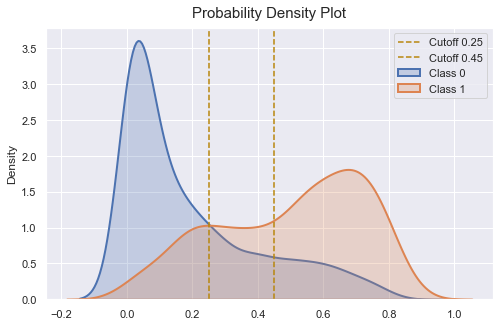

In [22]:
# Plot the probability density chart
plt.figure(figsize=(8,5))
sns.distplot(pred_probs[:,1][val_y==0],hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2},label='Class 0')
sns.distplot(pred_probs[:,1][val_y==1],hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2},label='Class 1')  
plt.axvline(0.25,color='darkgoldenrod',ls='--',label='Cutoff %.2f' % (0.25))
plt.axvline(0.45,color='darkgoldenrod',ls='--',label='Cutoff %.2f' % (0.45))
plt.title("Probability Density Plot",pad = 10,fontsize=15)
plt.legend()
plt.show()

To accomplish our goal, getting as many possible churners as we can, the cutoff
must be in that range as it **maximizes the number of non-churners** whose
predicted probability has a greater density of real churners than no churn clients.
Despite these points not being churners, looking at the plot we can see that there
is more real churners for those probability values, therefore we assume that those
clients give the profile of being future churners.

The objective of the model is to tell the company which clients should be called or give offers 
to ensure they do not stop paying our services. In case we have a significantly **big budget**, then the approach of reducing the cutoff is correct, as we want to **reach as many possible churners** as we can.

However, with this cutoff, we might make mistakes making offers to people
who were not going to leave the company, wasting our time and money. Therefore, if we did **not have such a big budget** for the marketing campaing, it would be better to **ensure that the clients that the model considered churners were truly going to leave**. The reason for this is that sending commercials is which is expensive. Then, in this case we should **increase the cutoff** to be more restrictive.

### 2.3 Train Optimal Model

The accuracy of the model is: 0.7524

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1385
           1       0.53      0.79      0.63       517

    accuracy                           0.75      1902
   macro avg       0.72      0.76      0.72      1902
weighted avg       0.80      0.75      0.76      1902
 

True Positives: 406  False Positives: 360 



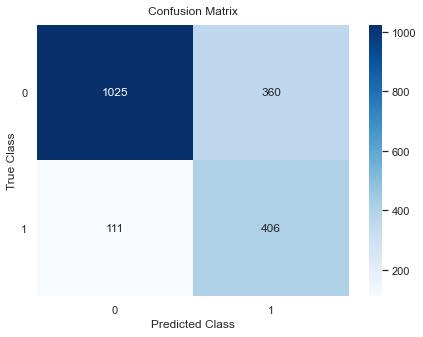

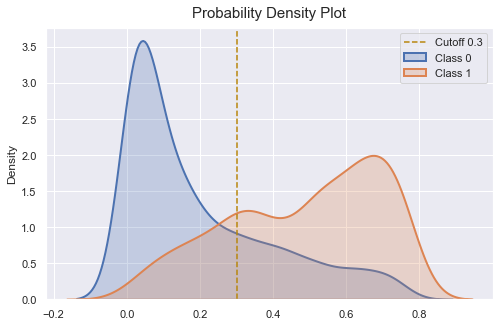

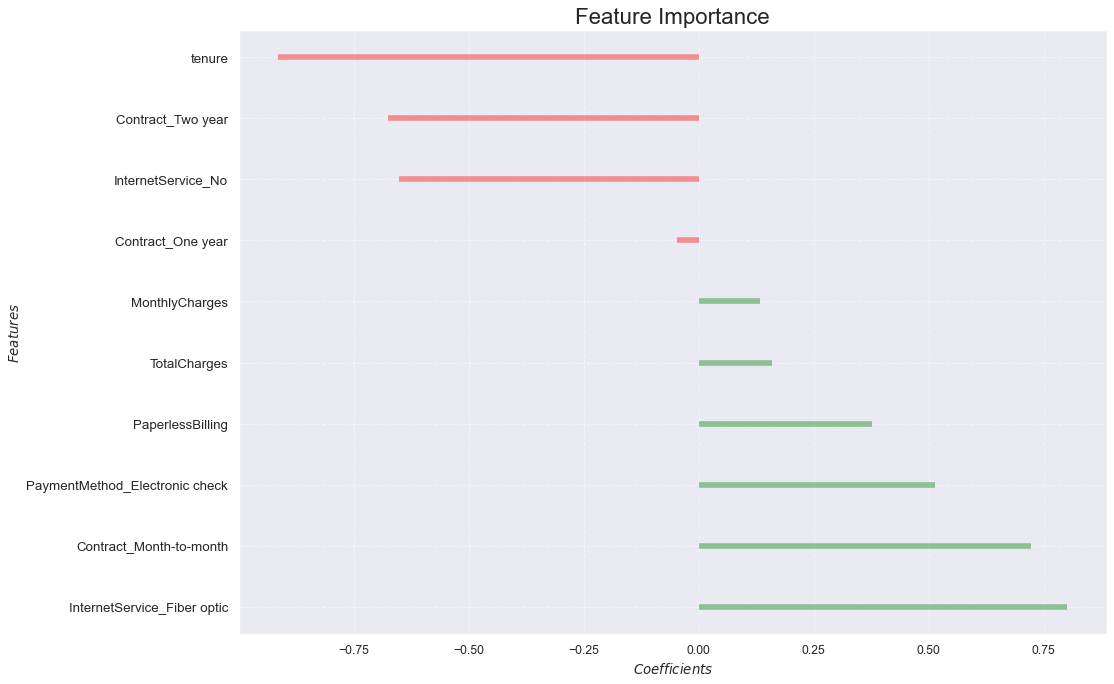

array([[0.99558079, 0.00441921],
       [0.95962628, 0.04037372],
       [0.90594046, 0.09405954],
       ...,
       [0.99135996, 0.00864004],
       [0.94059805, 0.05940195],
       [0.92815119, 0.07184881]])

In [23]:
# Split train, validation and test data
train_val, test = train_test_split(data, test_size = .1 ,random_state = 1)
train, val = train_test_split(train_val, test_size = .3 ,random_state = 1)

train_x = train[selected_variables]
train_y = train["Churn"]
val_x = val[selected_variables]
val_y = val["Churn"].values.ravel()


# Train Optimal Model
logit = LogisticRegression(C=0.1, max_iter=1000, solver='newton-cg', penalty='l2')

optimal_cutoff = 0.3

# Train the model (Considering we can send around 100 commercials)
train_model_and_performance_eval(logit, train_x, val_x, train_y, val_y, selected_variables, cutoff = optimal_cutoff) 

### 2.4 Predict over the test dataset which customers are possible churners or not

To do so we will add the following columns to the original test dataset: 
- PossibleChurner: Value {0,1}
- PossibleChurner_Proba: Probabilities [0,1]

In [24]:
# Supressing dataframe copy warning
pd.options.mode.chained_assignment = None

original_test = (original_data[original_data.customerID.isin(test.customerID)]).sort_values(by='customerID')
test = test.sort_values(by="customerID")

original_test['PossibleChurner_Proba'] = logit.predict_proba(test[selected_variables])[:,1]
original_test['PossibleChurner'] = logit.predict(test[selected_variables])

# Applying our cutoff value
original_test['PossibleChurner'].loc[original_test.PossibleChurner_Proba <= optimal_cutoff] = 0
original_test['PossibleChurner'].loc[original_test.PossibleChurner_Proba > optimal_cutoff] = 1  

# Computing metrics
FP = original_test[(original_test['Churn']=='No') & (original_test['PossibleChurner']==1)].shape[0]
TP = original_test[(original_test['Churn']=='Yes') & (original_test['PossibleChurner']==1)].shape[0]
print('True Positives (Already Churned):',TP,'\nFalse Positives (Possible Future Churners):',FP)

True Positives (Already Churned): 142 
False Positives (Possible Future Churners): 138


# **3. Lead Generation Pipeline**

For our case, we have been required to build up a Lead Generation Pipeline for potential churners that have hired a streaming service with our Telco company. In order to be able to build up the pipeline, let us assume that Business department provided the business rules that define how we must proceed:

**Leads classification**

Leads will be classified into three groups: Tier 1, Tier 2 and Tier 3, where Tier 1 belongs to best leads and Tier 3 for worst ones.

**Tiers assignation**

- **Tier 1**

  - Has Streaming TV and Movies 
  - Has any internet service
  - Tenure >= 12
  - Monthly charges >= 75


- **Tier 2**

  - Has Streaming TV or Movies 
  - Has any internet service
  - Tenure >= 12
  - Monthly charges >= 50
  

- **Tier 3**

  - Has Streaming TV or Movies 
  - The rest

The function *lead_generation_pipeline* will perform the Lead Generation Pipeline, following the rules stated above in. The output will be the same input with a new column (Tier) that contains the assigned tier value.

In [25]:
def lead_generation_pipeline(data: pd.DataFrame):
    # Filter to only those that are churners
    data = data[data.PossibleChurner == 1]
    
    tier_1 = data[(data.StreamingTV == 'Yes') & (data.StreamingMovies == 'Yes') &
                 (data.InternetService != 'No') & (data.tenure >= 12) & (data.MonthlyCharges >= 75)]
    
    
    tier_2 = data[((data.StreamingTV == 'Yes') | (data.StreamingMovies == 'Yes')) &
                 (data.InternetService != 'No') & (data.tenure >= 12) & (data.MonthlyCharges >= 50) & 
                 (~data.customerID.isin(tier_1.customerID.values))]
    
    tier_3 = data[(~data.customerID.isin(tier_1.customerID.values)) & (~data.customerID.isin(tier_2.customerID.values))]
    
    # Adding Tier attribute to each customer
    tier_1['Tier'] = 1
    tier_2['Tier'] = 2
    tier_3['Tier'] = 3
    
    # Check if every customer is assigned to a tier
    assert data.shape[0] == tier_1.shape[0] + tier_2.shape[0] + tier_3.shape[0] 
    
    # Build up the output dataframe by following the rules above
    output = pd.concat([tier_1,tier_2,tier_3])
    
    return output

In [26]:
output = lead_generation_pipeline(data = original_test)
output

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PossibleChurner_Proba,PossibleChurner,Tier
407,0111-KLBQG,Male,1,Yes,Yes,32,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.95,2861.45,No,0.421450,1,1
4410,0848-ZGQIJ,Female,0,Yes,No,16,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.65,1461.15,No,0.545698,1,1
2444,1254-IZEYF,Female,1,No,No,31,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.95,3186.65,Yes,0.570167,1,1
6550,1309-BXVOQ,Male,0,Yes,No,21,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.10,2249.95,Yes,0.649305,1,1
1749,1320-REHCS,Male,1,No,No,52,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,110.75,5832,No,0.434042,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,9747-DDZOS,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),73.50,73.5,Yes,0.543202,1,3
5652,9752-ZNQUT,Female,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,48.60,48.6,No,0.537541,1,3
1993,9828-AOQLM,Female,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.70,45.7,Yes,0.534308,1,3
5831,9846-GKXAS,Female,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),90.80,809.75,Yes,0.594125,1,3


Now that the data is clean, we will save the data and build up a dashboard where we will visualize the output of the pipeline and present our conclusions. The dashboard can has been done in any platform Tableau and can be accessed through the following [link](https://public.tableau.com/views/VisualAnalytics_ChurnDetection/Story?:language=es&:display_count=y&:origin=viz_share_link).

In [27]:
output.to_csv('output.csv', index = False)

## Dashboard Commentary and Insights

The created dashboard consists of a Tableau story with 3 pages. The first page
contains the plot [1]. By looking at it, we can understand how the model classifies
the customers in three different tiers. We can see what variables it takes into
account by hovering over the points. As we see in the pie chart half of the clients
are considered future churners.


<img src="../data/Story1.PNG" width=800>



In terms of functionalities, by clicking on one of the classes in the pie chart, we
will filter out the other class in the scatter plot below. Moreover, we can highlight
specific tiers or churn by clicking on the respective legend.
Plot [2] contains a profile of our possible churners. It will allow the marketing
team to understand the characteristics of the customers that we want to retain.
We can see that most of these clients do not have tech support and pay using
electronic check. In terms of gender, we see a higher proportion of males in our
possible churners, but it does not seem significant enough. If we analyse the
senior clients, we see that they represent around a 30% of tier 1, the ones most
important to retain.

<img src="../data/Story2.PNG" width=800>

Plot [3] shows a pie chart with the proportion of clients belonging to each tier. It
shows that most clients belong to tier 3 and around 40% belong to tiers 1 and 2.
By looking at the histograms, we can see that the model is confident (assigns
high probabilities) mostly to clients from tier 3. On the other hand, the
probabilities for clients of tiers 1 and 2 are lower. This means that our most
important customers are not as easy to identify as tier 3 clients.
In terms of functionalities, we can click on a tier in the pie chart to only show their
respective histograms


<img src="../data/Story3.PNG" width=800>